In [1]:
from __future__ import print_function

import math

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
import matplotlib.pyplot as plt

import plotly.plotly as py
import plotly.tools as tls
import plotly.graph_objs as go

import tensorflow as tf
import numpy as np
import pandas as pd
import sqlalchemy

import sklearn.metrics as metrics
from tensorflow.python.data import Dataset

In [2]:
#getting movies dataset using Pandas from movie_metadata provided by Prof Zhang
movies_dataframe =  pd.read_csv("movie_metadata.csv", sep=",")
movies_dataframe

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


In [3]:
#getting actors dataset using Pandas from BuzzFeed
actors_dataframe = pd.read_csv("actor-metrics.csv", sep=",")

In [4]:
#getting biopics dataset using Pandas from 
biopics_dataframe = pd.read_csv("biopics.csv", sep=",", encoding='latin-1')

In [5]:
#renaming the lead actors column name for each table to have the same name 'lead_actors'
movies_dataframe = movies_dataframe.rename(columns={'actor_1_name': 'lead_actors'})
actors_dataframe = actors_dataframe.rename(columns={'actor': 'lead_actors'})
biopics_dataframe = biopics_dataframe.rename(columns={'lead_actor_actress': 'lead_actors'})

In [6]:
#Clean Up Part 1: Remove unnecessary columns
#I think we should first eliminate unnecessary columns and then merge, this way the table is easier to look at
#We should remove movies that are too old for us to look at!
movies_dataframe = movies_dataframe[['lead_actors', 'movie_title', 'title_year', 'gross', 'movie_facebook_likes']]
actors_dataframe = actors_dataframe[['lead_actors', 'gender', 'race_simple']]

In [7]:
#Clean Up Part 2: Merge
movies_dataframe_merged = movies_dataframe.merge(actors_dataframe,on='lead_actors').query('title_year>=2010.0')
# Something doesn't seem to work. On the right part of the big table there are weird things happening: 
# Another director than at the start, other films? Somehow we can not merge the tables this way I think? 
# Or is this part not about movies but just the actors? Then we really need to get rid of most columns!

In [8]:
movies_dataframe_merged

,lead_actors,movie_title,title_year,gross,movie_facebook_likes,gender,race_simple
0,Tom Hardy,The Dark Knight Rises,2012.0,448130642.0,164000,male,White
1,Tom Hardy,The Dark Knight Rises,2012.0,448130642.0,164000,male,White
2,Tom Hardy,The Dark Knight Rises,2012.0,448130642.0,164000,male,White
3,Tom Hardy,Mad Max: Fury Road,2015.0,153629485.0,191000,male,White
4,Tom Hardy,Mad Max: Fury Road,2015.0,153629485.0,191000,male,White
5,Tom Hardy,Mad Max: Fury Road,2015.0,153629485.0,191000,male,White
6,Tom Hardy,This Means War,2012.0,54758461.0,18000,male,White
7,Tom Hardy,This Means War,2012.0,54758461.0,18000,male,White
8,Tom Hardy,This Means War,2012.0,54758461.0,18000,male,White
12,Tom Hardy,Child 44,2015.0,1206135.0,18000,male,White


In [9]:
#Clean Up Part 3: Remove duplicates
#remove duplicates based on the movie – even though the actors are still duplicated but they worked on different projects with different gross
movies_dataframe_noDuplicates = movies_dataframe_merged.drop_duplicates(subset=['movie_title'], keep='first', inplace=False)
movies_dataframe_noDuplicates

,lead_actors,movie_title,title_year,gross,movie_facebook_likes,gender,race_simple
0,Tom Hardy,The Dark Knight Rises,2012.0,448130642.0,164000,male,White
3,Tom Hardy,Mad Max: Fury Road,2015.0,153629485.0,191000,male,White
6,Tom Hardy,This Means War,2012.0,54758461.0,18000,male,White
12,Tom Hardy,Child 44,2015.0,1206135.0,18000,male,White
15,Tom Hardy,Legend,2015.0,1865774.0,43000,male,White
18,Tom Hardy,Warrior,2011.0,13651662.0,77000,male,White
34,Peter Dinklage,Ice Age: Continental Drift,2012.0,161317423.0,14000,male,White
35,Peter Dinklage,Pixels,2015.0,78747585.0,39000,male,White
36,Peter Dinklage,The Angry Birds Movie,2016.0,107225164.0,14000,male,White
38,Peter Dinklage,The Boss,2016.0,63034755.0,0,male,White


In [10]:
# VISUALIZATION
#First, get data for top categories: male - female, white - not white
#Sorted by date
movies_f = movies_dataframe_noDuplicates.query('gender=="female"').sort_values(by=['title_year', 'gross', 'movie_facebook_likes'])
movies_m = movies_dataframe_noDuplicates.query('gender=="male"').sort_values(by=['title_year', 'gross', 'movie_facebook_likes'])
movies_w = movies_dataframe_noDuplicates.query('race_simple=="White"').sort_values(by=['title_year', 'gross', 'movie_facebook_likes'])
movies_n = movies_dataframe_noDuplicates.query('race_simple=="POC"').sort_values(by=['title_year', 'gross', 'movie_facebook_likes'])

In [11]:
#Next, get data for sub categories: male & white, male & not white, female & white, female & not white
#Sometimes, the date is missing. We need to research the dates if they are missing.
movies_mw = movies_m.query('race_simple=="White"')
movies_mn = movies_m.query('race_simple=="POC"')
movies_fw = movies_f.query('race_simple=="White"')
movies_fn = movies_f.query('race_simple=="POC"')

In [16]:
def vis_bar(title, x_axis, y_axis1, y_label1, y_axis2, y_label2):
    ind = np.arange(len(x_axis))
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    ax2 = ax.twinx() #https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib#14762601

    #https://matplotlib.org/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py
    rects1 = ax.bar(ind - width/2, y_axis1, width, yerr=0,
                color='SkyBlue', label=y_label1)
    rects2 = ax2.bar(ind + width/2, y_axis2, width, yerr=0,
                color='IndianRed', label=y_label2)

    ax.set_title(title)

    ax.set_ylabel(y_label1)
    ax2.set_ylabel(y_label2)

    ax.set_xticks(ind)
    ax.set_xticklabels(x_axis)

    ax.legend()
    ax2.legend()
    
    # https://stackoverflow.com/questions/10998621/rotate-axis-text-in-python-matplotlib
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)
    
    # https://codeyarns.com/2014/10/27/how-to-change-size-of-matplotlib-plot/
    fig_size = plt.rcParams["figure.figsize"]
    ratio = fig_size[1] / fig_size[0]
    fig_size[0] = len(x_axis) #standard width = 6.0
    fig_size[1] = 4 #TODO: need to figure out how to calculate correct height, maybe with ratio
    plt.rcParams["figure.figsize"] = fig_size
    print(fig_size, ratio)
    
    plt.rcParams["font.size"] = 10.0
    
    plt.show()

[8, 4] 0.6666666666666666


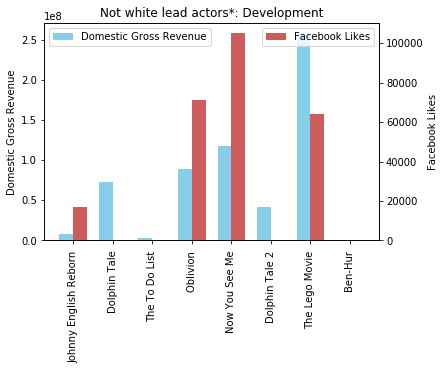

[25, 4] 0.5


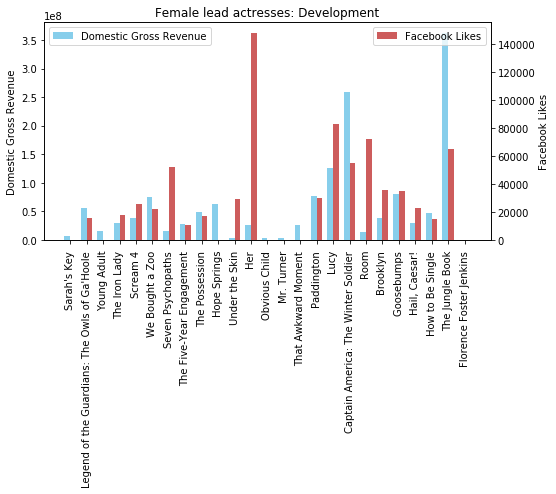

[94, 4] 0.16


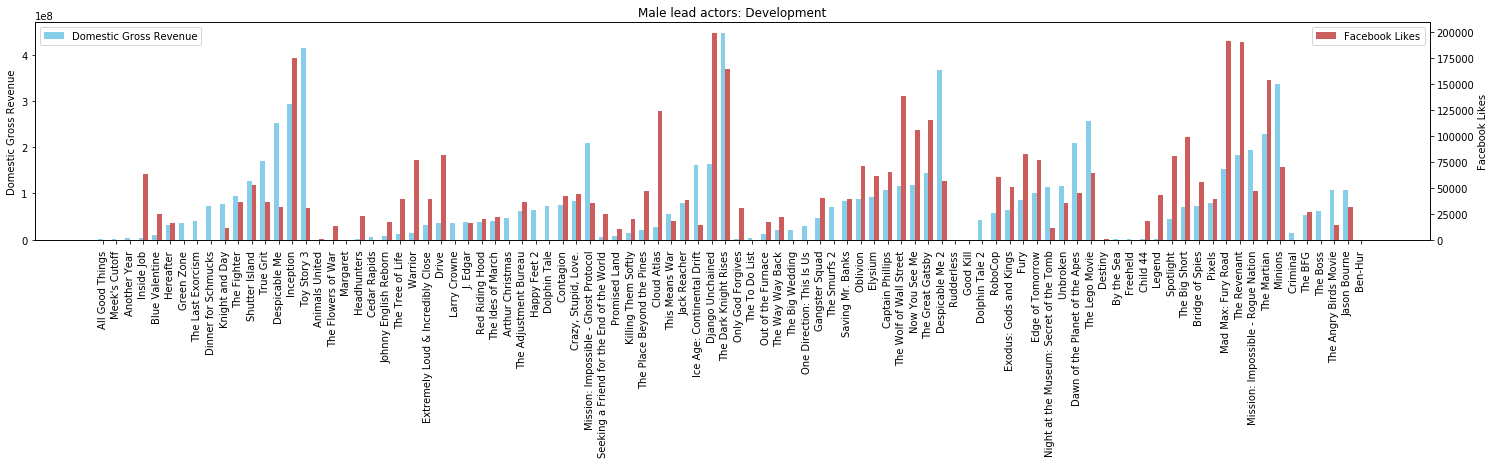

[111, 4] 0.0425531914893617


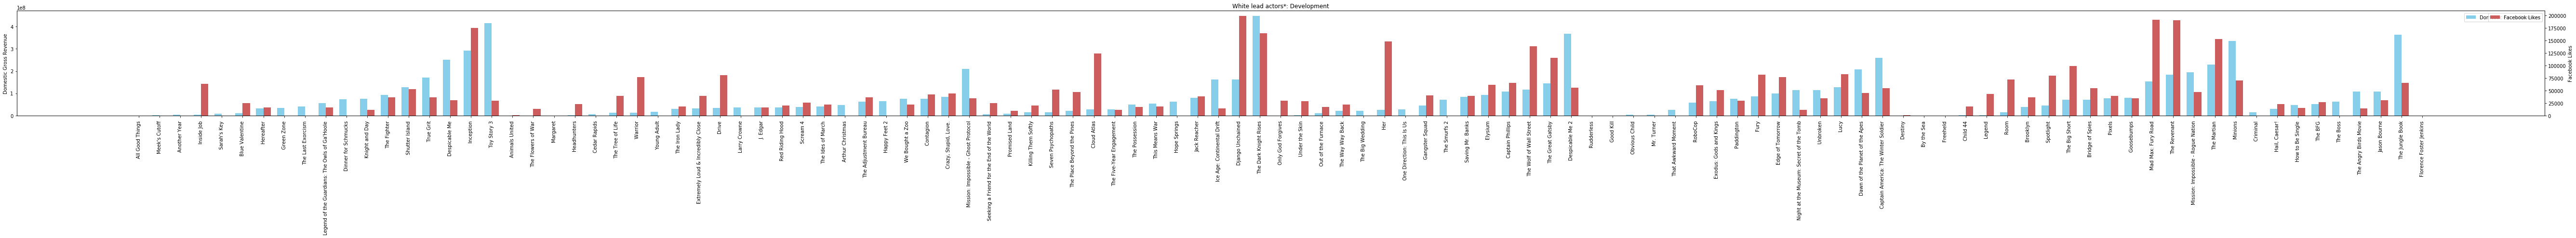

In [17]:
vis_bar(title='Not white lead actors*: Development', x_axis=movies_n['movie_title'], y_axis1=movies_n['gross'], y_label1='Domestic Gross Revenue', y_axis2=movies_n['movie_facebook_likes'], y_label2='Facebook Likes')

vis_bar(title='Female lead actresses: Development', x_axis=movies_f['movie_title'], y_axis1=movies_f['gross'], y_label1='Domestic Gross Revenue', y_axis2=movies_f['movie_facebook_likes'], y_label2='Facebook Likes')

vis_bar(title='Male lead actors: Development', x_axis=movies_m['movie_title'], y_axis1=movies_m['gross'], y_label1='Domestic Gross Revenue', y_axis2=movies_m['movie_facebook_likes'], y_label2='Facebook Likes')

vis_bar(title='White lead actors*: Development', x_axis=movies_w['movie_title'], y_axis1=movies_w['gross'], y_label1='Domestic Gross Revenue', y_axis2=movies_w['movie_facebook_likes'], y_label2='Facebook Likes')

